In [49]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=127391 sha256=1c64733ab976ae74ad06fb213ca7005836327743fe96dcad64ca49ca1ef05ef3
  Stored in directory: /tmp/pip-ephem-wheel-cache-mnqgzk5a/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
import straph.paths.meta_walks as mw
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "sigmasv_nodes-simple.sg",
                      path_links=path_directory + "sigmasv_links-simple.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  4
Nb of segmented links :  7.0
Nb of event times :  7


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


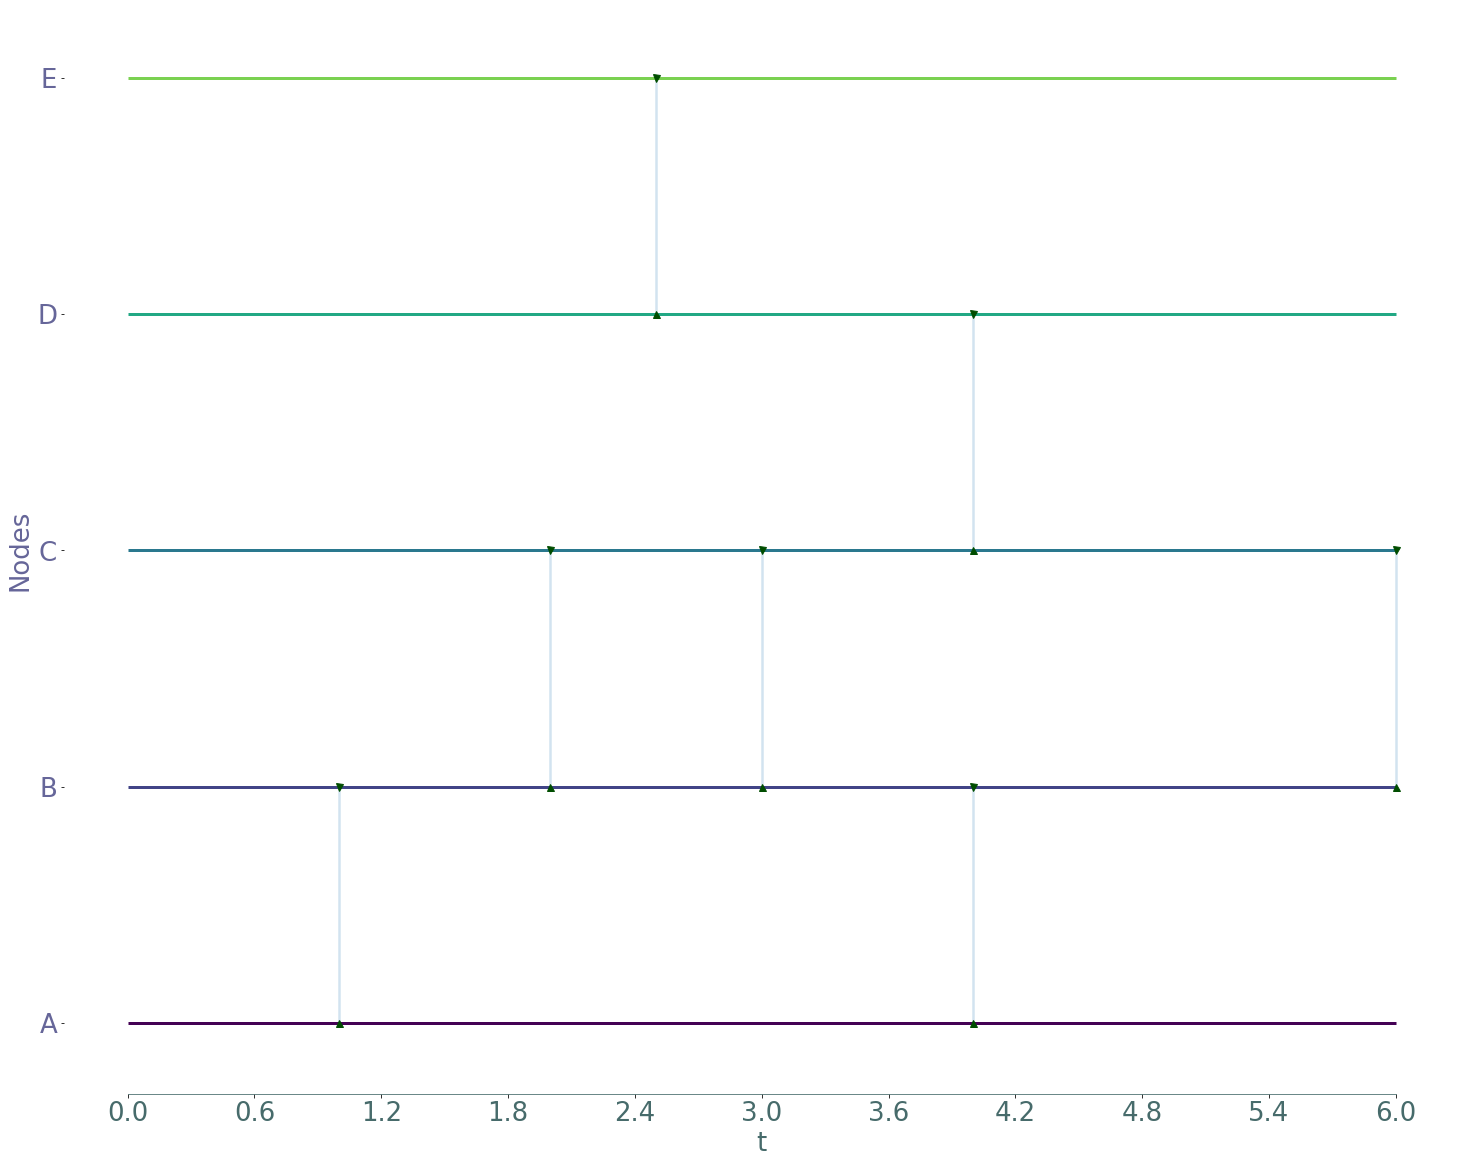

In [2]:
S.plot()

In [3]:
events, events_reverse = bt.events_dic(S)

In [4]:
neighbors, neighbors_inv = bt.neighbors_direct(S)

In [5]:
node = 4

In [6]:
import operator
import networkx as nx
b = operator.lt
walk_type = "active"
fun =  mw.Metawalk.co_sfp

In [7]:
pre, cur_best, opt_walk = bt.dijkstra_directed_dis_gen(S, node, events, events_reverse, neighbors, neighbors_inv, b, fun, walk_type)


In [8]:
#pre, cur_best, opt_walk = bt.ford_bellman_directed_gen_dis(S, node, events, events_reverse, neighbors, neighbors_inv, b, fun, walk_type)


In [9]:
cur_best[2]

{0.0: inf, 1.0: inf, 2.0: inf, 2.5: inf, 3.0: inf, 4.0: inf, 6.0: inf}

In [10]:
cur_best2[2]

NameError: name 'cur_best2' is not defined

In [11]:
G = bt.predecessor_graph_dis_gen(S, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)


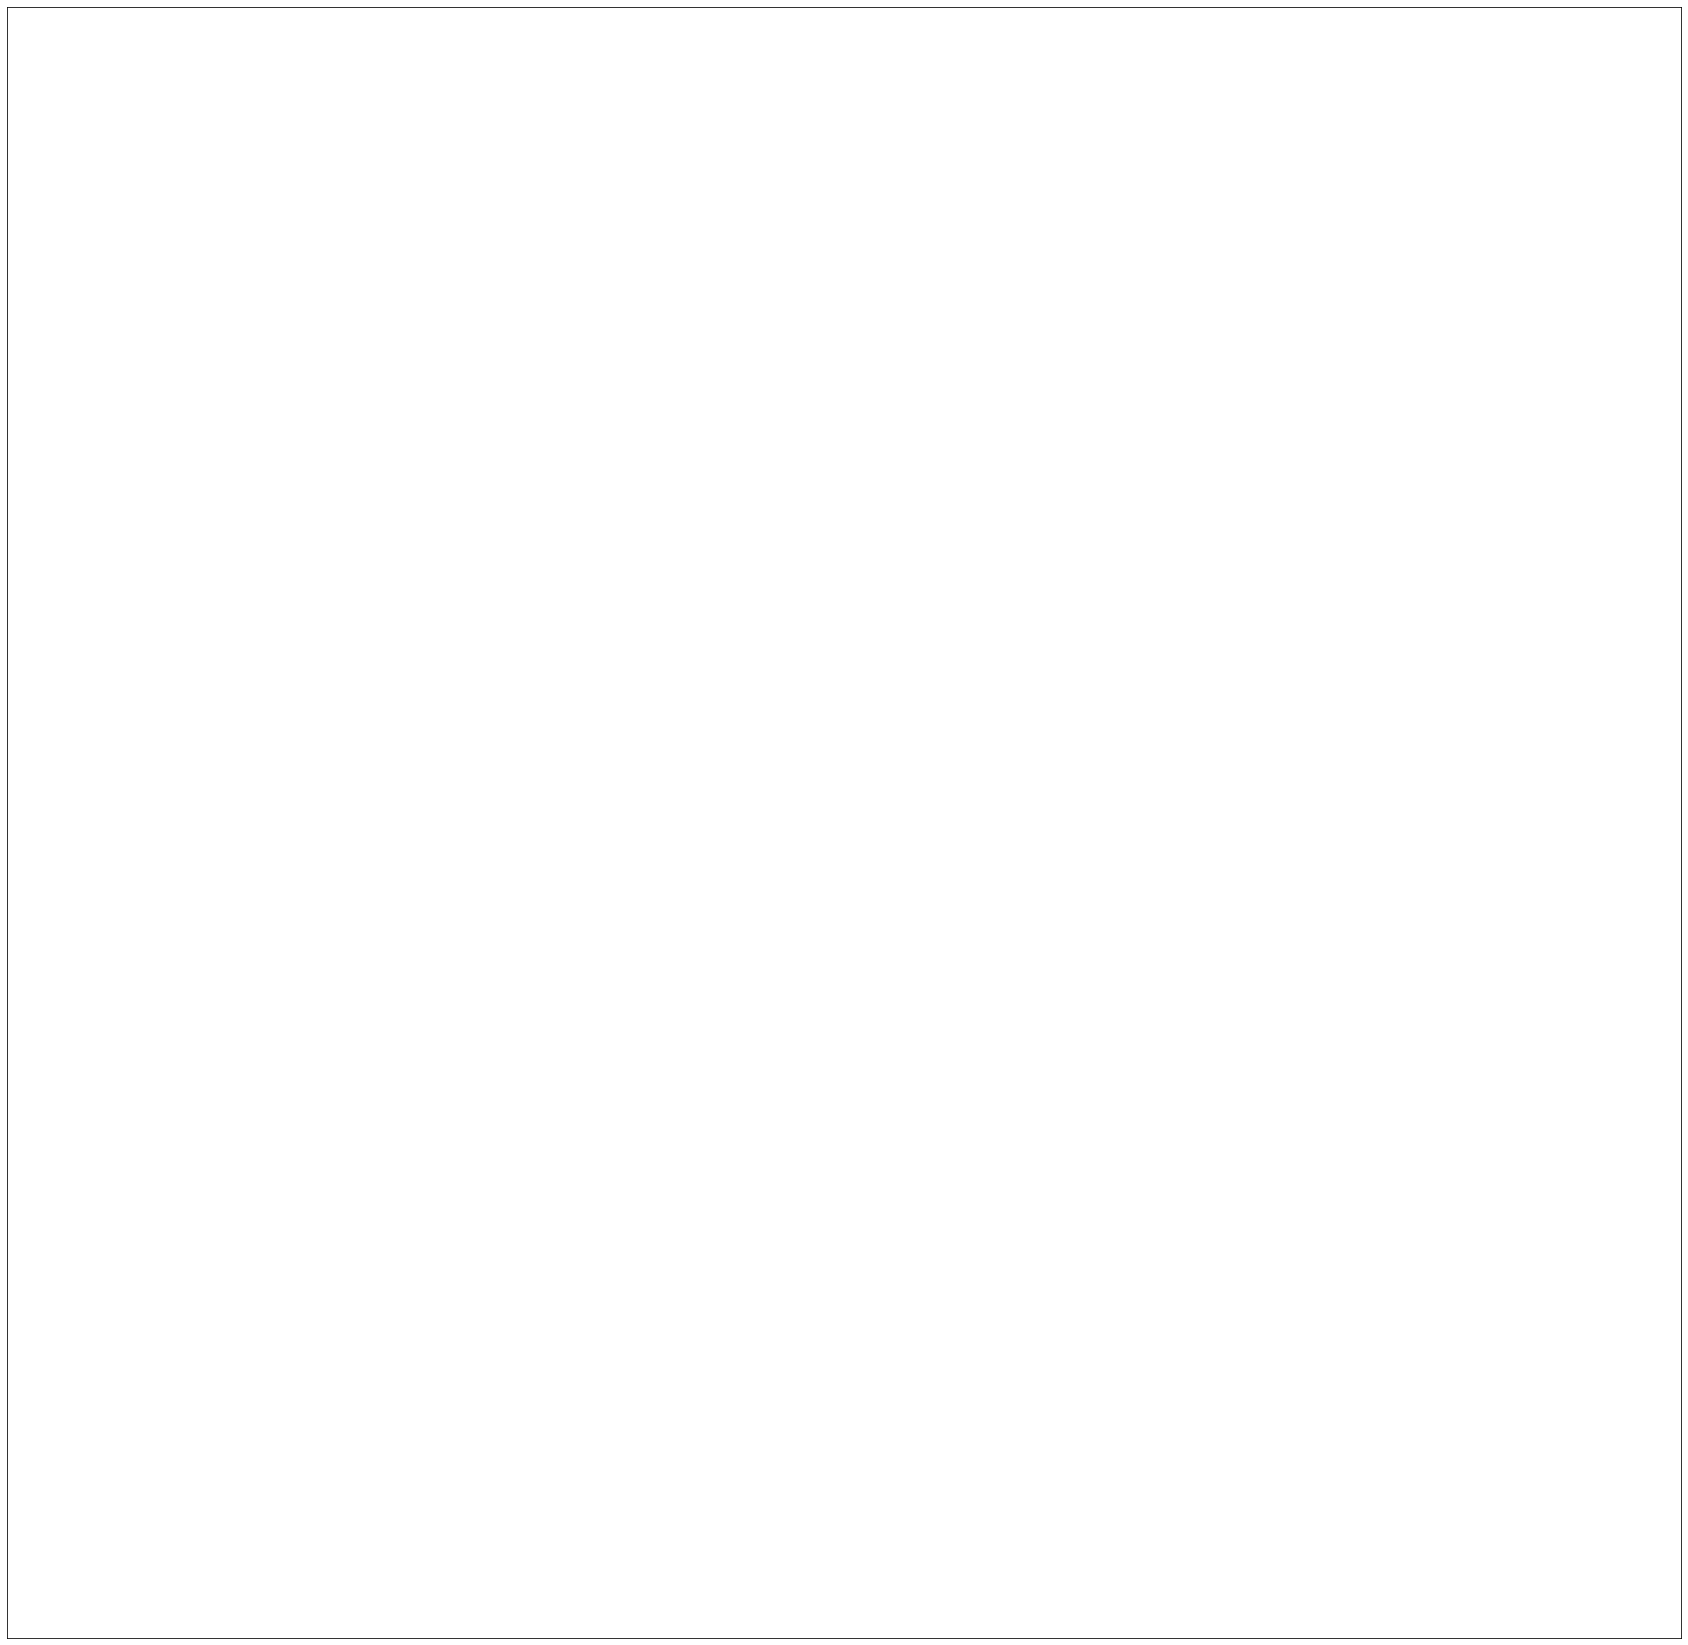

In [12]:
import networkx as nx
GD = G.graph
ren = dict()
for e in GD.nodes:
    ren[e] = (S.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

In [13]:
G.graph[(1,4)]

KeyError: (1, 4)

In [14]:
inf_scc = set()
scc = nx.kosaraju_strongly_connected_components(G.graph)
for s in scc:
    if len(s) > 1:
        inf_scc.add(s)

In [15]:
H = nx.condensation(G.graph)
res = set()
for s in inf_scc:
    for e in nx.bfs_edges(H, s):
        inf_scc.add(e)

In [16]:
temp_inf = set()
for s in inf_scc:
    for v in s:
        temp_inf.add(v)
for v in temp_inf:
    G.remove_node(v)

In [17]:
clos_inf = bt.infinite_closure(S, G, events, events_reverse, temp_inf, opt_walk, cur_best, mw.Metawalk.co_short, len(S.nodes))

In [18]:
node_inf = temp_inf.union(clos_inf)

In [19]:
sigma = bt.volume_metapaths_at_dis_gen(G, node, S.alpha)
if walk_type == "active":
    sigma_r = bt.optimal_with_resting_dis_gen(S, node, events, G, sigma, cur_best, node_inf, opt_walk, mw.Metawalk.co_short, len(S.nodes))
else:
    sigma_r = dict()
    for e in sigma.keys():
        sigma_r[e] = sigma[e]

In [20]:
sigma

{}

In [21]:
sigma_r

{(0, 0.0): 0.0,
 (0, 1.0): 0.0,
 (0, 2.0): 0.0,
 (0, 2.5): 0.0,
 (0, 3.0): 0.0,
 (0, 4.0): 0.0,
 (0, 6.0): 0.0,
 (1, 0.0): 0.0,
 (1, 1.0): 0.0,
 (1, 2.0): 0.0,
 (1, 2.5): 0.0,
 (1, 3.0): 0.0,
 (1, 4.0): 0.0,
 (1, 6.0): 0.0,
 (2, 0.0): 0.0,
 (2, 1.0): 0.0,
 (2, 2.0): 0.0,
 (2, 2.5): 0.0,
 (2, 3.0): 0.0,
 (2, 4.0): 0.0,
 (2, 6.0): 0.0,
 (3, 0.0): 0.0,
 (3, 1.0): 0.0,
 (3, 2.0): 0.0,
 (3, 2.5): 0.0,
 (3, 3.0): 0.0,
 (3, 4.0): 0.0,
 (3, 6.0): 0.0,
 (4, 0.0): 1,
 (4, 1.0): 1,
 (4, 2.0): 1,
 (4, 2.5): 1,
 (4, 3.0): 1,
 (4, 4.0): 1,
 (4, 6.0): 1}

In [22]:
sigma_tot, min_values, sigma_tot_t = bt.sigma_total_dis_gen(sigma, S, cur_best, node, events, walk_type)

In [23]:
sigma_tot_t

{0: {}, 1: {}, 2: {}, 3: {}, 4: {}}

In [24]:
sigma_tot

{}

In [25]:
sigma_tot_r = bt.complete_sigma_tot_t(S, sigma_tot_t, node_inf, events, node, walk_type)

In [26]:
sigma_tot_r

{(0, 0.0): 0,
 (0, 1.0): 0,
 (0, 2.0): 0,
 (0, 2.5): 0,
 (0, 3.0): 0,
 (0, 4.0): 0,
 (0, 6.0): 0,
 (1, 0.0): 0,
 (1, 1.0): 0,
 (1, 2.0): 0,
 (1, 2.5): 0,
 (1, 3.0): 0,
 (1, 4.0): 0,
 (1, 6.0): 0,
 (2, 0.0): 0,
 (2, 1.0): 0,
 (2, 2.0): 0,
 (2, 2.5): 0,
 (2, 3.0): 0,
 (2, 4.0): 0,
 (2, 6.0): 0,
 (3, 0.0): 0,
 (3, 1.0): 0,
 (3, 2.0): 0,
 (3, 2.5): 0,
 (3, 3.0): 0,
 (3, 4.0): 0,
 (3, 6.0): 0,
 (4, 0.0): 0,
 (4, 1.0): 0,
 (4, 2.0): 0,
 (4, 2.5): 0,
 (4, 3.0): 0,
 (4, 4.0): 0,
 (4, 6.0): 0}

In [27]:
deltasvvt = bt.dictionary_svvt_dis_gen(S, node, sigma_tot_r,min_values, cur_best, sigma_tot, events)

In [28]:
deltasvvt

{(0, 0.0): 0.0,
 (0, 1.0): 0.0,
 (0, 2.0): 0.0,
 (0, 2.5): 0.0,
 (0, 3.0): 0.0,
 (0, 4.0): 0.0,
 (0, 6.0): 0.0,
 (1, 0.0): 0.0,
 (1, 1.0): 0.0,
 (1, 2.0): 0.0,
 (1, 2.5): 0.0,
 (1, 3.0): 0.0,
 (1, 4.0): 0.0,
 (1, 6.0): 0.0,
 (2, 0.0): 0.0,
 (2, 1.0): 0.0,
 (2, 2.0): 0.0,
 (2, 2.5): 0.0,
 (2, 3.0): 0.0,
 (2, 4.0): 0.0,
 (2, 6.0): 0.0,
 (3, 0.0): 0.0,
 (3, 1.0): 0.0,
 (3, 2.0): 0.0,
 (3, 2.5): 0.0,
 (3, 3.0): 0.0,
 (3, 4.0): 0.0,
 (3, 6.0): 0.0,
 (4, 0.0): 0.0,
 (4, 1.0): 0.0,
 (4, 2.0): 0.0,
 (4, 2.5): 0.0,
 (4, 3.0): 0.0,
 (4, 4.0): 0.0,
 (4, 6.0): 0.0}

In [29]:
preced = bt.preced_node(S, G,events,events_reverse)

In [30]:
preced[1]

KeyError: 1

In [31]:
contribution = bt.general_contribution_from_node_dis_gen(S, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, preced, walk_type)

In [32]:
contribution

{0: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0},
 1: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0},
 2: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0},
 3: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0},
 4: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0}}

In [33]:
{2: {6.0: 0.0, 3.0: 0.5, 2.0: 1.5, 0.0: 0.0, 1.0: 0.0, 2.5: 0.0, 4.0: 0.0},
 1: {4.0: 0.5, 1.0: 2.5, 0.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 6.0: 0.0},
 3: {4.0: 1.0, 0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 6.0: 0.0},
 0: {0.0: 3.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0},
 4: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0}}

{2: {6.0: 0.0, 3.0: 0.5, 2.0: 1.5, 0.0: 0.0, 1.0: 0.0, 2.5: 0.0, 4.0: 0.0},
 1: {4.0: 0.5, 1.0: 2.5, 0.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 6.0: 0.0},
 3: {4.0: 1.0, 0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 6.0: 0.0},
 0: {0.0: 3.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0},
 4: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0}}